In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway, chi2_contingency

In [39]:
yulu_data = pd.read_csv("bike_sharing.txt")

In [40]:
yulu_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [41]:
yulu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [42]:
yulu_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [43]:
#Data Cleaning and Preprocessing

In [44]:
# Convert categorical columns to 'category' type
yulu_data['season'] = yulu_data['season'].astype('category')
yulu_data['holiday'] = yulu_data['holiday'].astype('category')
yulu_data['workingday'] = yulu_data['workingday'].astype('category')
yulu_data['weather'] = yulu_data['weather'].astype('category')

# Check for missing values
print(yulu_data.isnull().sum())


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [45]:
#Univariate Analysis (distribution plots of all the continuous variable(s) 
#barplots/countplots of all the categorical variables)

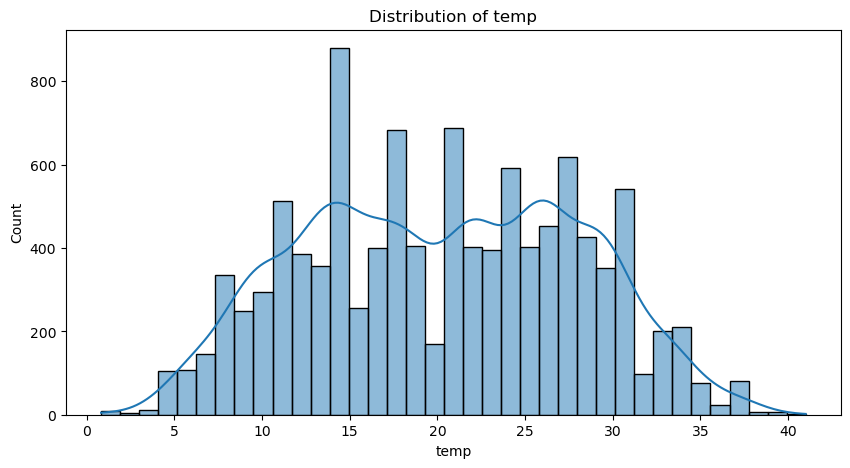

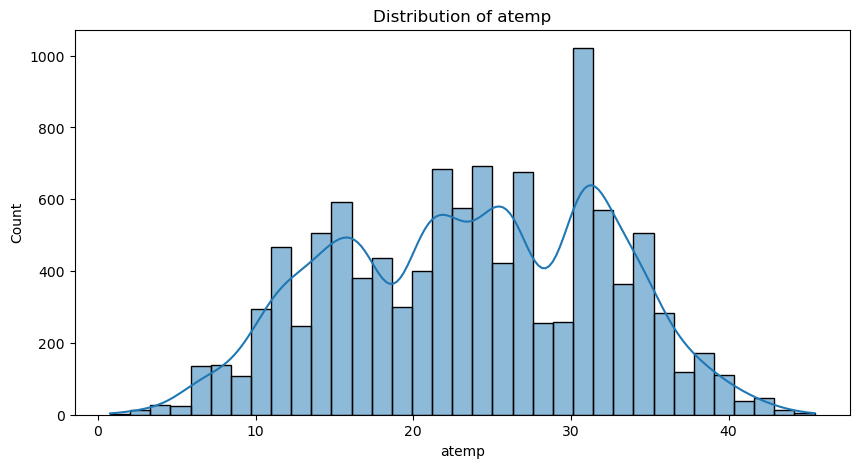

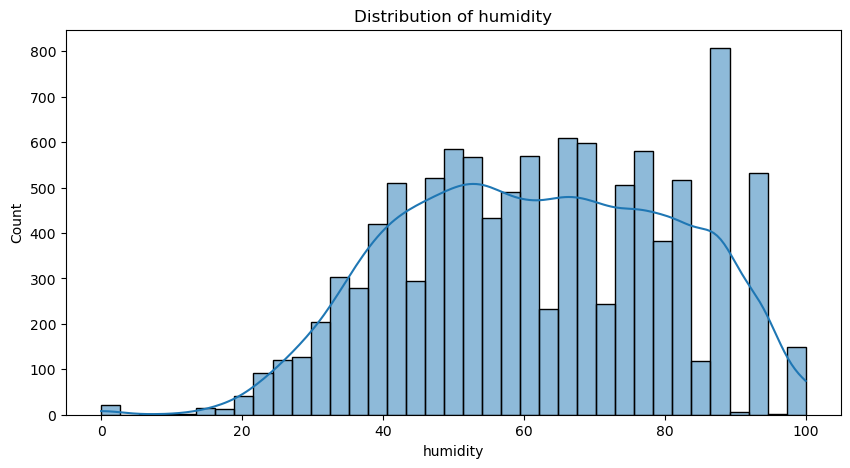

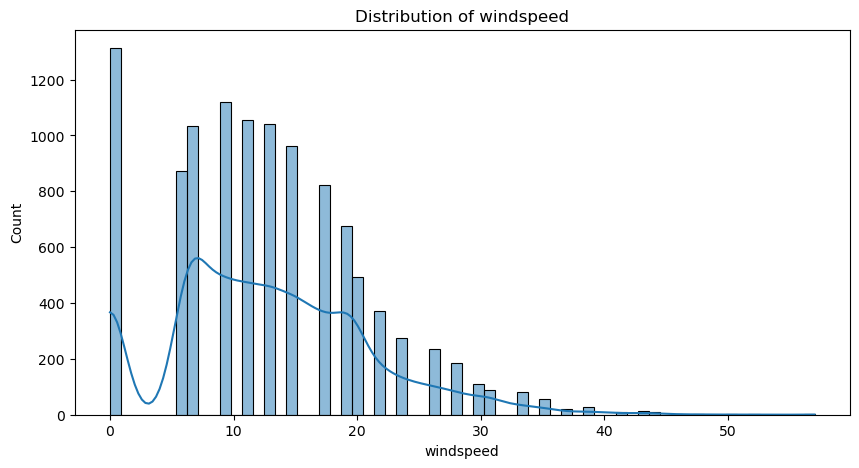

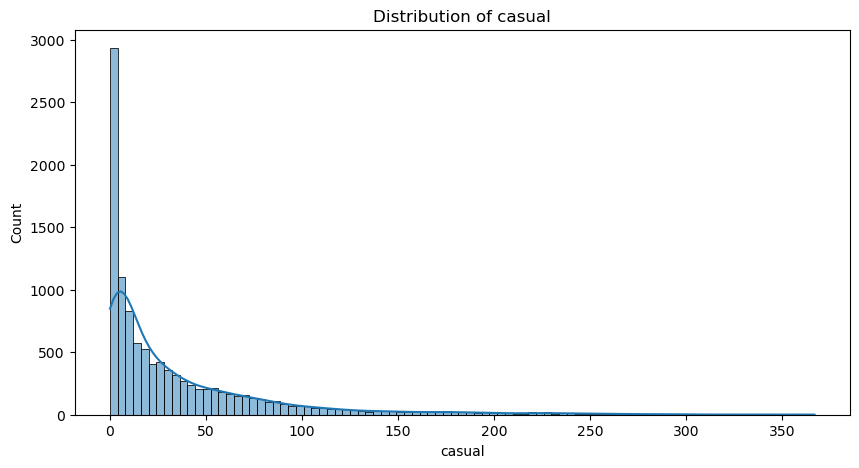

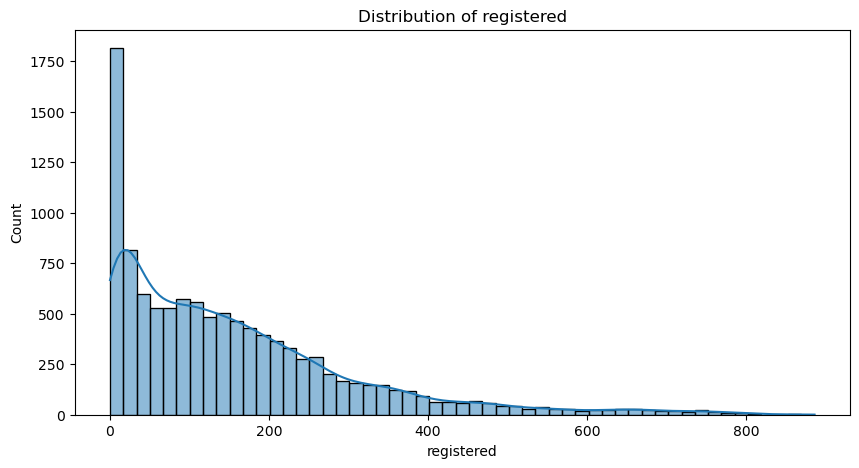

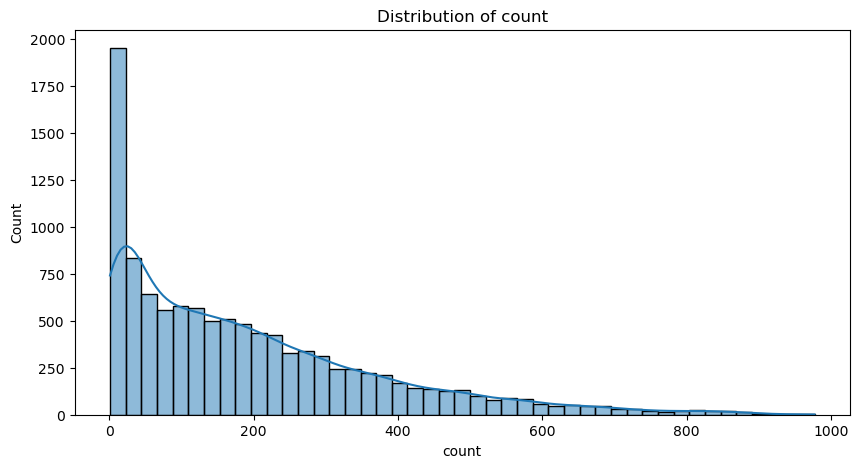

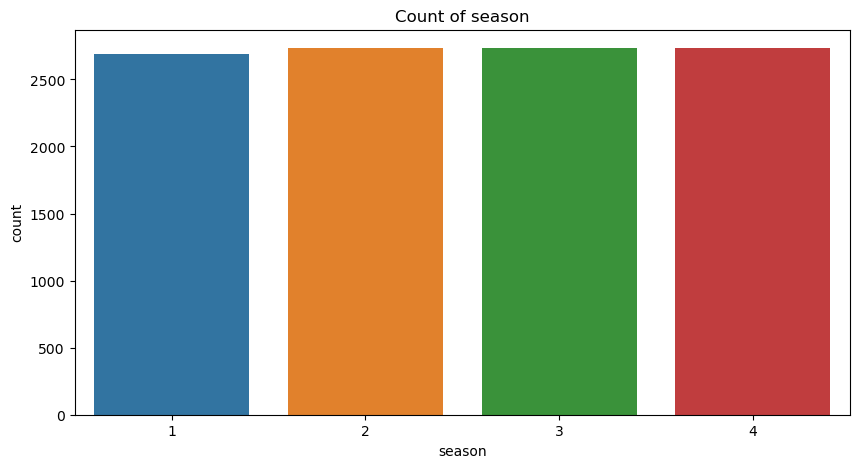

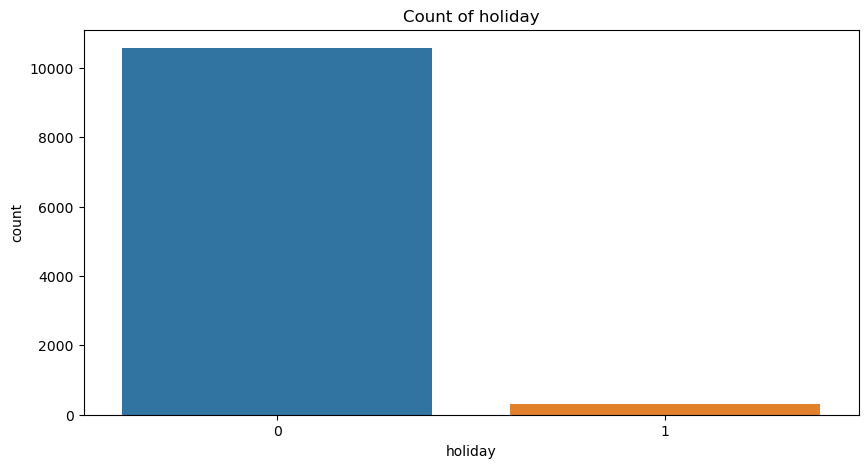

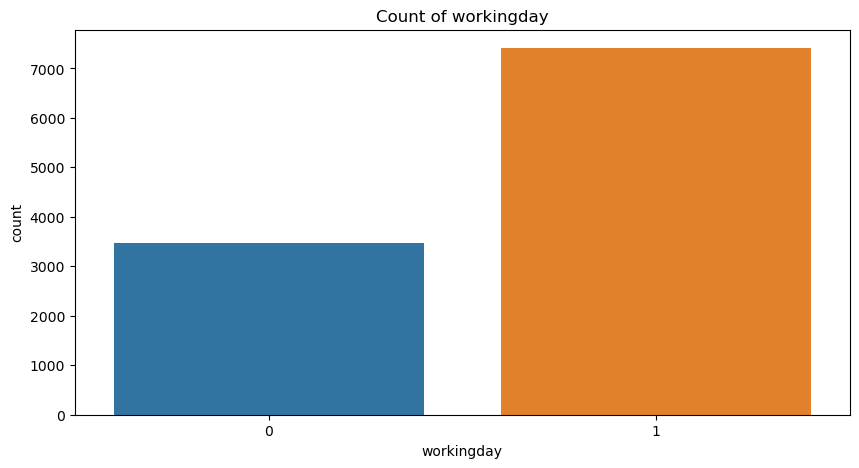

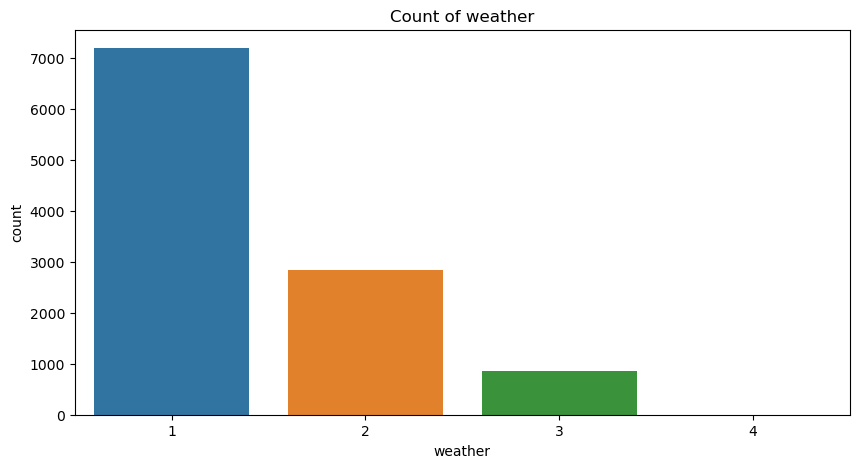

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Continuous variables
continuous_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

for var in continuous_vars:
    plt.figure(figsize=(10, 5))
    sns.histplot(yulu_data[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

# Categorical variables
categorical_vars = ['season', 'holiday', 'workingday', 'weather']

for var in categorical_vars:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=var, data=yulu_data)
    plt.title(f'Count of {var}')
    plt.show()


In [47]:
#Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count.

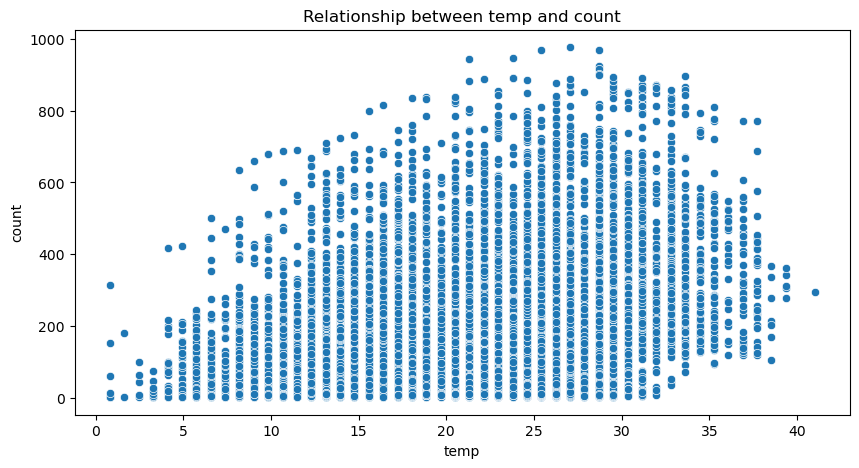

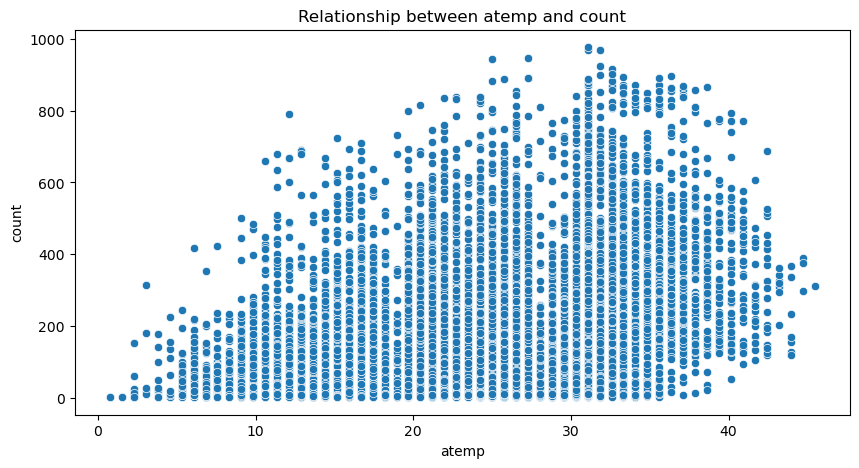

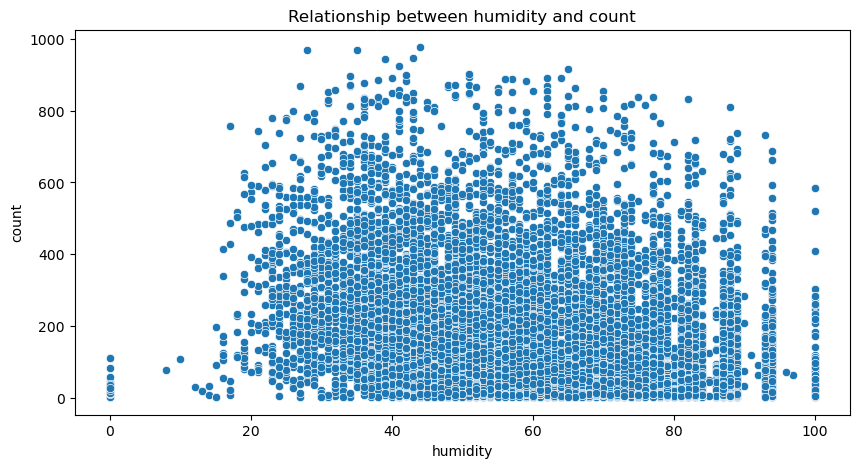

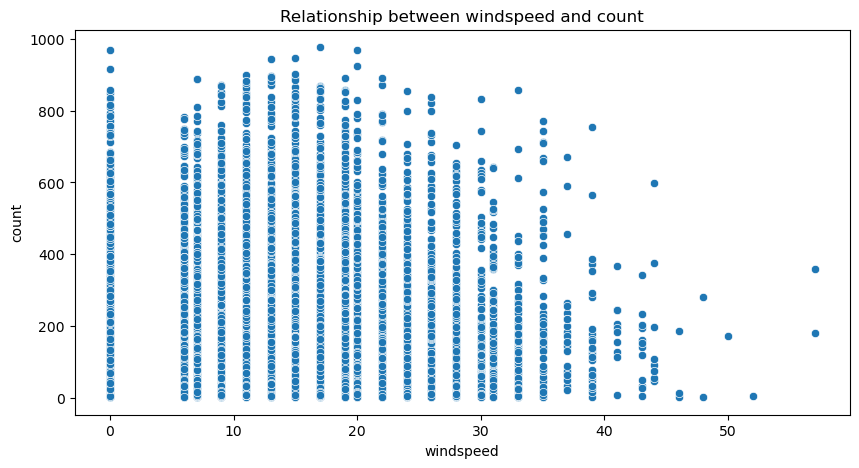

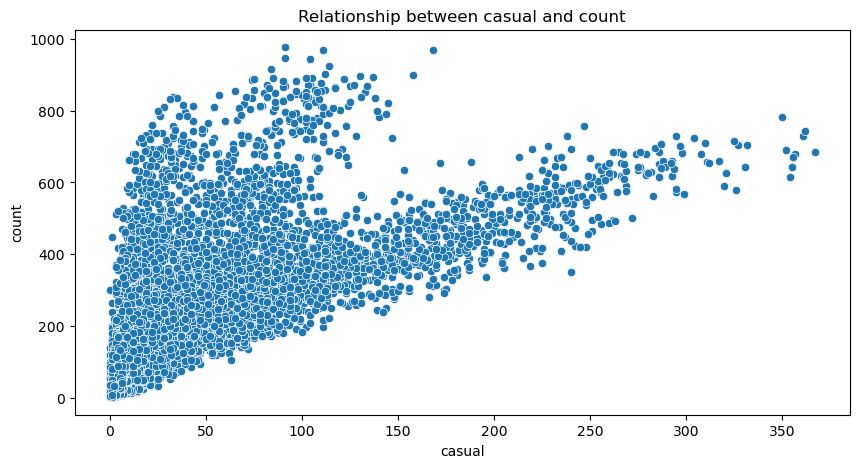

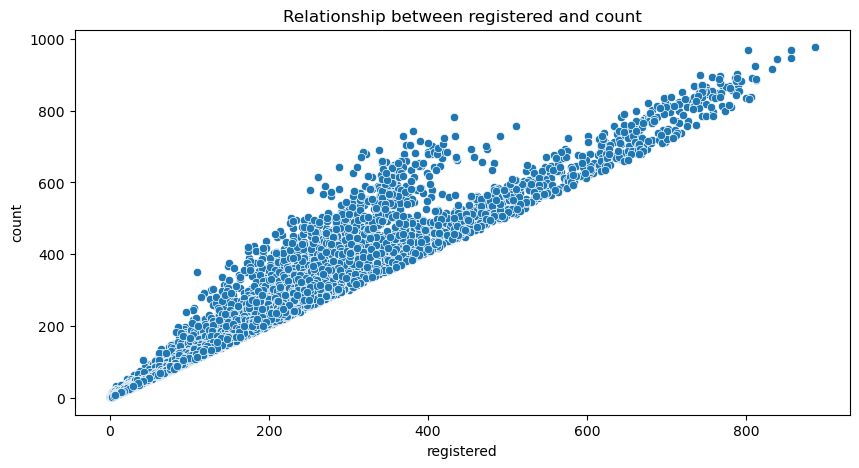

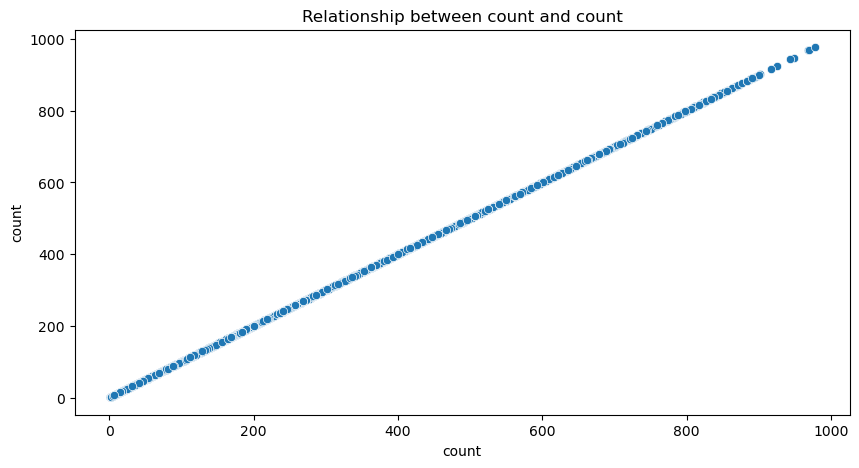

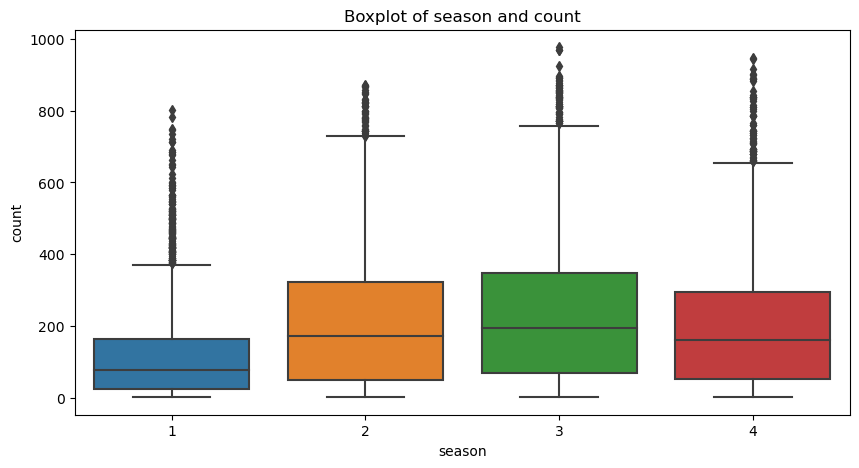

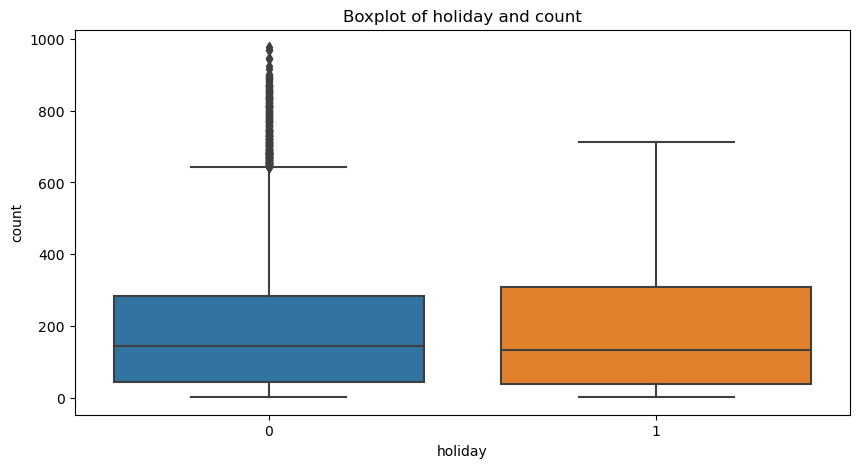

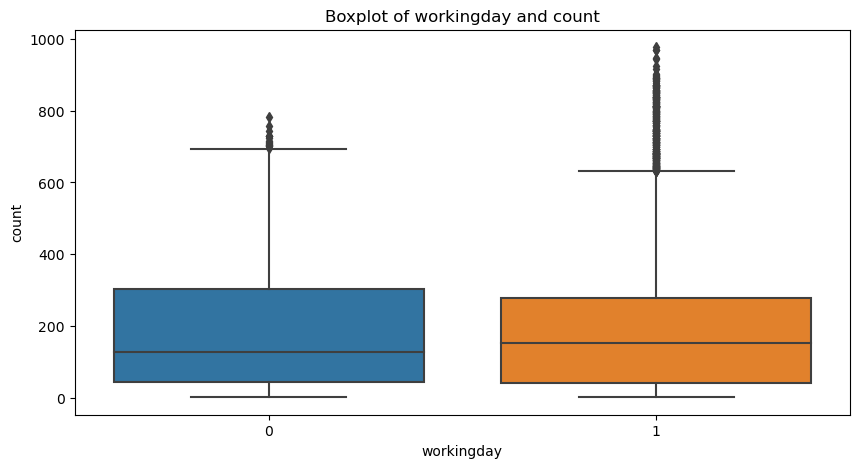

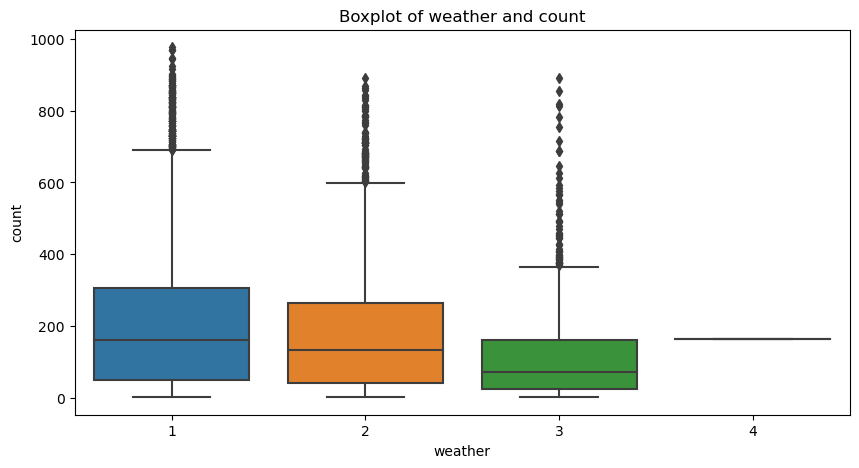

In [48]:
# Relationship between count and continuous variables
for var in continuous_vars:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=var, y='count', data=yulu_data)
    plt.title(f'Relationship between {var} and count')
    plt.show()

# Box plots for categorical variables
for var in categorical_vars:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=var, y='count', data=yulu_data)
    plt.title(f'Boxplot of {var} and count')
    plt.show()




# Hypothesis Testing

In [49]:
#Hypothesis 1: Effect of Working Day on Number of Electric Cycles Rented

. Null Hypothesis (H0): Working day has no effect on the number of electric cycles rented.

. Alternative Hypothesis (H1): Working day has an effect on the number of electric cycles rented.

# Independent 2-sample t-test

In [50]:
from scipy.stats import ttest_ind

# Split data into working day and non-working day
working_day = yulu_data[yulu_data['workingday'] == 1]['count']
non_working_day = yulu_data[yulu_data['workingday'] == 0]['count']

# Perform t-test
t_stat, p_value = ttest_ind(working_day, non_working_day)
print(f'T-statistic: {t_stat}, P-value: {p_value}')


T-statistic: 1.2096277376026694, P-value: 0.22644804226361348


# Interpretation

In [51]:
# P-value:

The p-value of 0.2264 is greater than the common alpha level of 0.05. This means we do not have enough evidence to reject the null hypothesis.


In [52]:
#Conclusion: 

At a 5% significance level, we fail to reject the null hypothesis. This suggests that there is no significant effect of whether it is a working day or not on the number of electric cycles rented.

In summary, based on the independent 2-sample t-test conducted, the data does not provide sufficient evidence to conclude that working days have a significant impact on the number of electric cycles rented.

In [53]:
#Hypothesis 2: Difference in Number of Cycles Rented Across Seasons

. Null Hypothesis (H0): Number of cycles rented is similar across seasons.

. Alternative Hypothesis (H1): Number of cycles rented is different across seasons.

# ANOVA

In [54]:
from scipy.stats import f_oneway

# Split data by season
spring = yulu_data[yulu_data['season'] == 1]['count']
summer = yulu_data[yulu_data['season'] == 2]['count']
fall = yulu_data[yulu_data['season'] == 3]['count']
winter = yulu_data[yulu_data['season'] == 4]['count']

# Perform ANOVA
f_stat, p_value = f_oneway(spring, summer, fall, winter)
print(f'F-statistic: {f_stat}, P-value: {p_value}')


F-statistic: 236.94671081032106, P-value: 6.164843386499654e-149


# Interpretation

In [55]:
#P-value

The p-value of 6.1648e-149 is much less than the common significance level of 0.05. This indicates that the difference in the mean number of cycles rented across the seasons is statistically significant.

In [56]:
#Conclusion:

At a 5% significance level, we reject the null hypothesis. This suggests that there is a significant difference in the number of cycles rented across different seasons.

In [57]:
#Hypothesis 3: Difference in Number of Cycles Rented Across Weather Conditions

Null Hypothesis (H0): Number of cycles rented is similar across different weather conditions.

Alternative Hypothesis (H1): Number of cycles rented is different across different weather conditions.

# ANOVA

In [58]:
# Split data by weather
clear = yulu_data[yulu_data['weather'] == 1]['count']
mist = yulu_data[yulu_data['weather'] == 2]['count']
light_rain_snow = yulu_data[yulu_data['weather'] == 3]['count']
heavy_rain_snow = yulu_data[yulu_data['weather'] == 4]['count']

# Perform ANOVA
f_stat, p_value = f_oneway(clear, mist, light_rain_snow, heavy_rain_snow)
print(f'F-statistic: {f_stat}, P-value: {p_value}')


F-statistic: 65.53024112793271, P-value: 5.482069475935669e-42


# Interpretation

In [59]:
#P-value:

The p-value of 5.4821e-42 is much less than the common significance level of 0.05. This indicates that the difference in the mean number of cycles rented across the different weather conditions is statistically significant.

In [60]:
#Conclusion

At a 5% significance level, we reject the null hypothesis. This suggests that there is a significant difference in the number of cycles rented across different weather conditions.

In [61]:
#Hypothesis 4: Dependence of Weather on Season

Null Hypothesis (H0): Weather is independent of the season.

Alternative Hypothesis (H1): Weather is dependent on the season.

# Chi-square test

In [62]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(yulu_data['season'], yulu_data['weather'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square statistic: {chi2_stat}, P-value: {p_value}')


Chi-square statistic: 49.158655596893624, P-value: 1.549925073686492e-07


# Interpretation

In [63]:
#P-value:

The p-value of 1.5499e-07 is much less than the common significance level of 0.05. This indicates that there is a statistically significant association between weather conditions and seasons.

In [64]:
#Conclusion: 

At a 5% significance level, we reject the null hypothesis. This suggests that weather conditions are dependent on the season.

# Inference

Based on the EDA and hypothesis testing, we can derive insights about the factors affecting the demand for shared electric cycles. Key findings would be the significance of working days, seasonal variations, weather conditions, and interdependence of weather and season on the demand. The next steps would involve refining the analysis, possibly using regression models to quantify the impact of significant variables on the demand for Yulu's services.

# Conclusion

This analysis helps Yulu understand key demand drivers and can guide strategic decisions to improve usage rates and revenue. More advanced models and further analysis can provide deeper insights and more precise recommendations.